# **1. IMPORT LIBRARY**

In [1]:
import warnings
warnings.simplefilter('ignore')

# library umum
import numpy as np 
import pandas as pd  


# library GA
import random
from random import randint

# library keras
import tensorflow
from tensorflow import keras
from keras import models
from keras import layers
from keras import metrics
from tensorflow.keras.optimizers import Adam,RMSprop

# library sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score

# library menampilkan data
import seaborn as sns
import matplotlib.pyplot as plt

# **2. DATA UNDERSTANDING**

## **2.1. IMPORT DATA**

Pada proses ini kita lakukakan import library yang akan digunakan untuk melakukan proses perhitungan pada algoritma GA dan MLP. Library yang digunakan adalah library umum, library GA, library keras, library sklearn, dan library menampilkan data.

In [2]:
# # mounting google drive to Colab Runtime environment. Koneksi Ke G.Drive
# from google.colab import drive
# drive.mount("/content/gdrive")

selanjutnya load dataset yang akan digunakan, dataset heartcleveland.csv dapat diunduh di https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci?datasetId=576697&sortBy=voteCount&searchQuery=MLP

In [3]:
# load data
dataset = pd.read_csv('D:\CODING\SMT5\SoftCompPrak\DataSet\Kelompok 3\heart_cleveland.csv')
# dataset = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset/heart_cleveland.csv')

melihat dataset tersebut secara sekilas, menggunakan head()

In [4]:
#isi dataset
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


## **2.2. DESKRIPSI DATA**

Terdapat 14 Atribut, 13 features dan 1 label/target

- age: umur dalam tahun
- sex: Jenis Kelamin (1 = laki-laki; 0 = perempuan)
- cp: tipe rasa sakit di dalam dada
- -- Value 0: typical angina
- -- Value 1: atypical angina
- -- Value 2: non-anginal pain
- -- Value 3: asymptomatic
- trestbps: resting tekanan darah  (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (gula darah setelah puasa > 120 mg/dl) (1 = true; 0 = false)
- restecg: hasil resting electrocardiographic 
- -- Value 0: normal
- -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: detak jantung tertinggi yang diraih
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- -- Value 0: upsloping
- -- Value 1: flat
- -- Value 2: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect and the label
- condition: 0 = no disease, 1 = disease

In [5]:
#deskripsi data
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Melihat deskripsi data, seperti jumlah baris dan kolom, rata-rata, standar deviasi, nilai minimum dan maksimum, dan nilai kuartil.

In [6]:
# Checking for any missing data or non-numerical data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


melihat missing data dan non numeric data

In [7]:
dataX = dataset.drop('condition',axis=1)
datay = dataset[['condition']]

Memisahkan data feature dan data target


In [8]:
print("Heart Cleveland Dataset:\n",dataset.shape[0],"Records\n",dataset.shape[1],"Features")

Heart Cleveland Dataset:
 297 Records
 14 Features


## **2.3. PLOTTING DATA**

### **2.3.1. PLOTTING INFORMASI DATA**

Melihat jumlah pria dan wanita dalam dataset tersebut

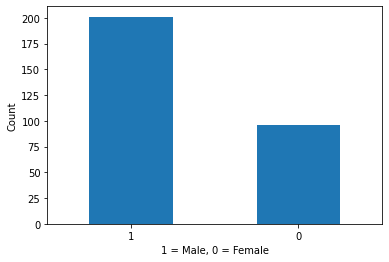

In [9]:
dataset.sex.value_counts().plot(kind = "bar")
plt.xlabel("1 = Male, 0 = Female")
plt.ylabel("Count")
plt.xticks(rotation = 0)
plt.show()

melihat jumlah tingkat rasa sakit dengan diagnosa positive atau negative

In [10]:
pd.crosstab(dataset.condition, dataset.cp).T

condition,0,1
cp,,
0,16,7
1,40,9
2,65,18
3,39,103


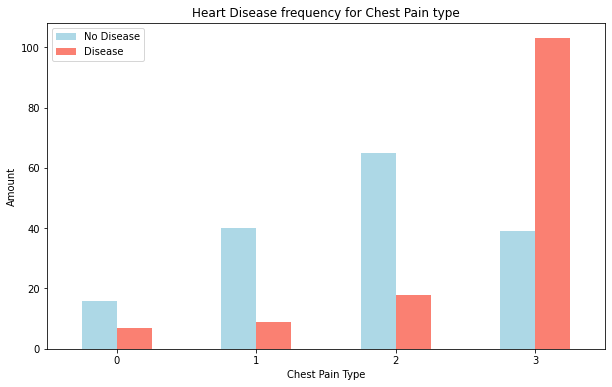

In [11]:
pd.crosstab(dataset.cp, dataset.condition).plot(kind = "bar",
                                   figsize = (10, 6),
                                   color = ["lightblue", "salmon"])

plt.title("Heart Disease frequency for Chest Pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.xticks(rotation = 0)
plt.legend(["No Disease", "Disease"])

melihat kondisi dengan umur

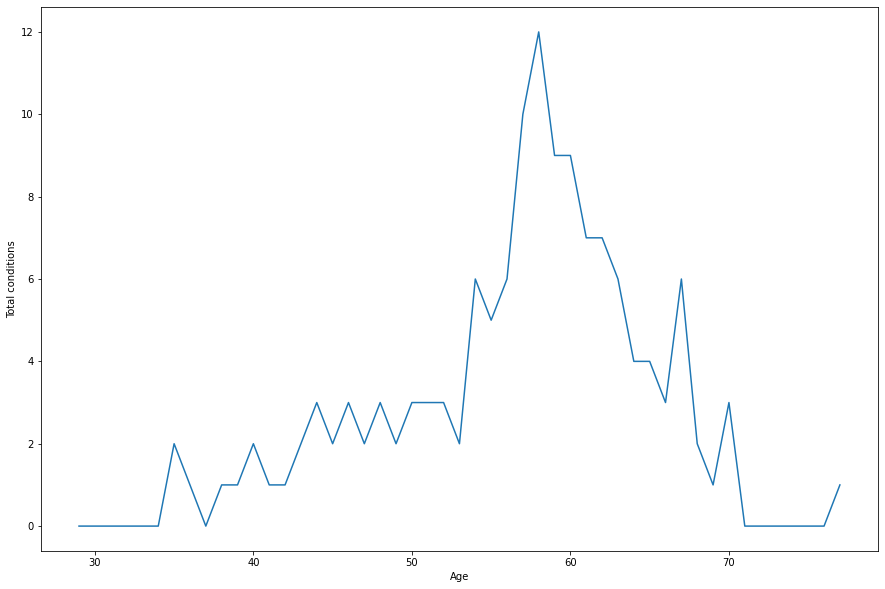

In [12]:
data = dataset.groupby("age").sum()
data.condition.plot(kind = "line", figsize = (15,10))
plt.xlabel("Age")
plt.ylabel("Total conditions")
plt.show()

### **2.3.2. PLOTTING PENYEBARAN DATA**

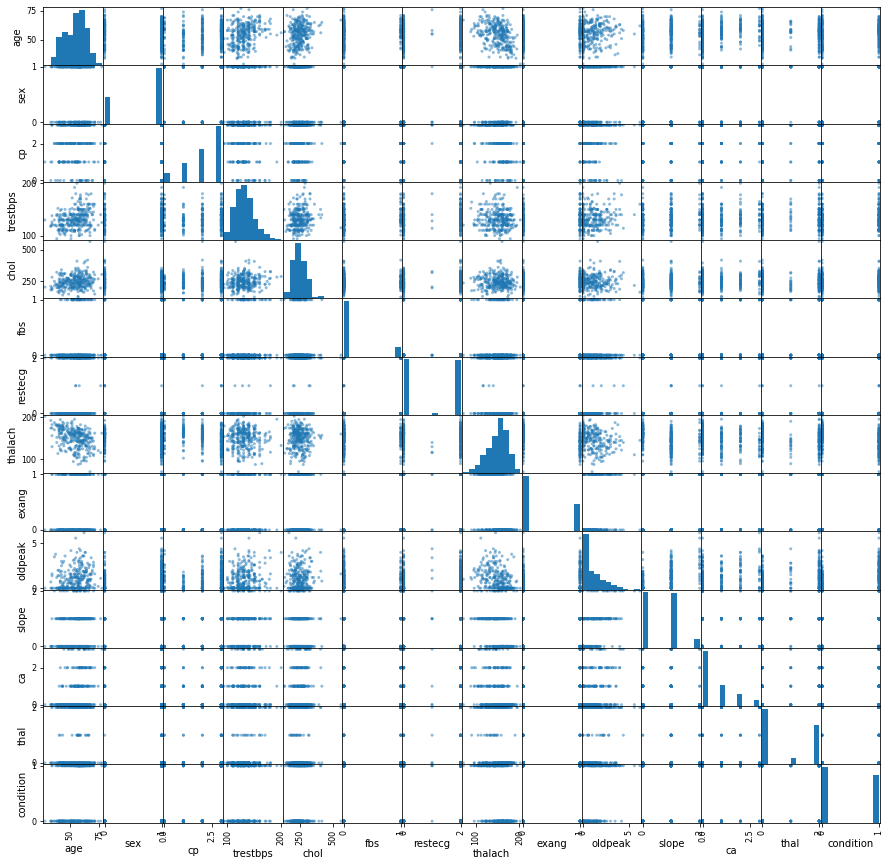

In [13]:
#plotting penyebaran data
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, alpha=0.5, figsize=(15, 15))
plt.show()

## **2.3.3. PLOTTING JUMLAH DATA**

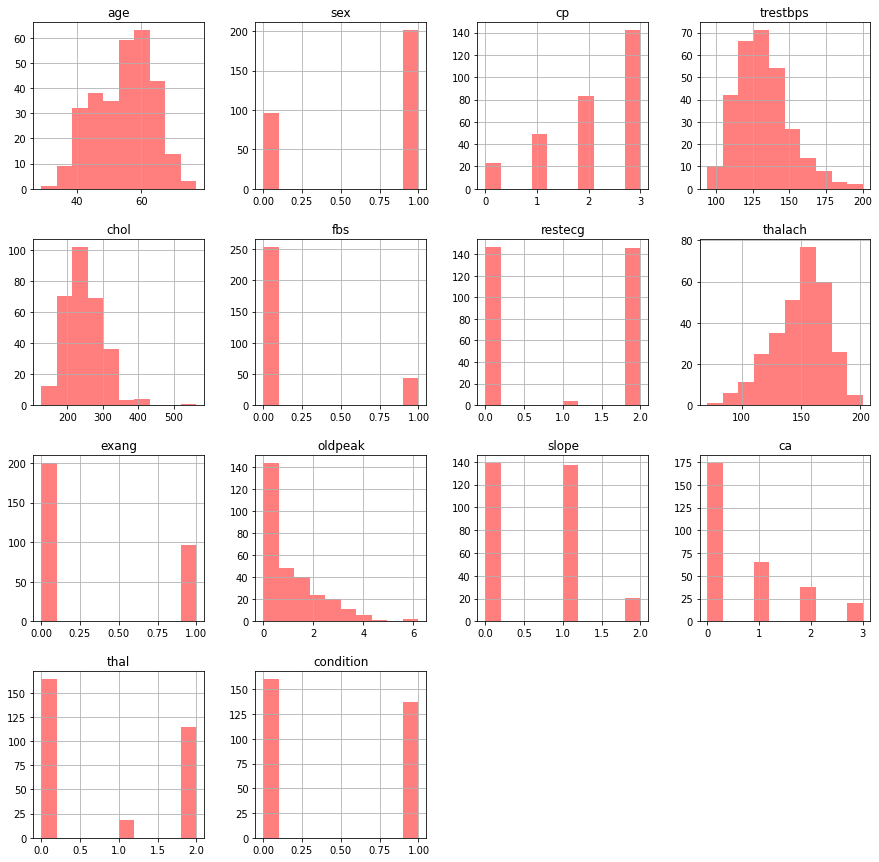

In [14]:
#plotting jumlah data
dataset.hist(alpha=0.5, figsize=(15, 15), color='red')
plt.show()

## **2.3.4. PLOTTING GRAFIK DATA**

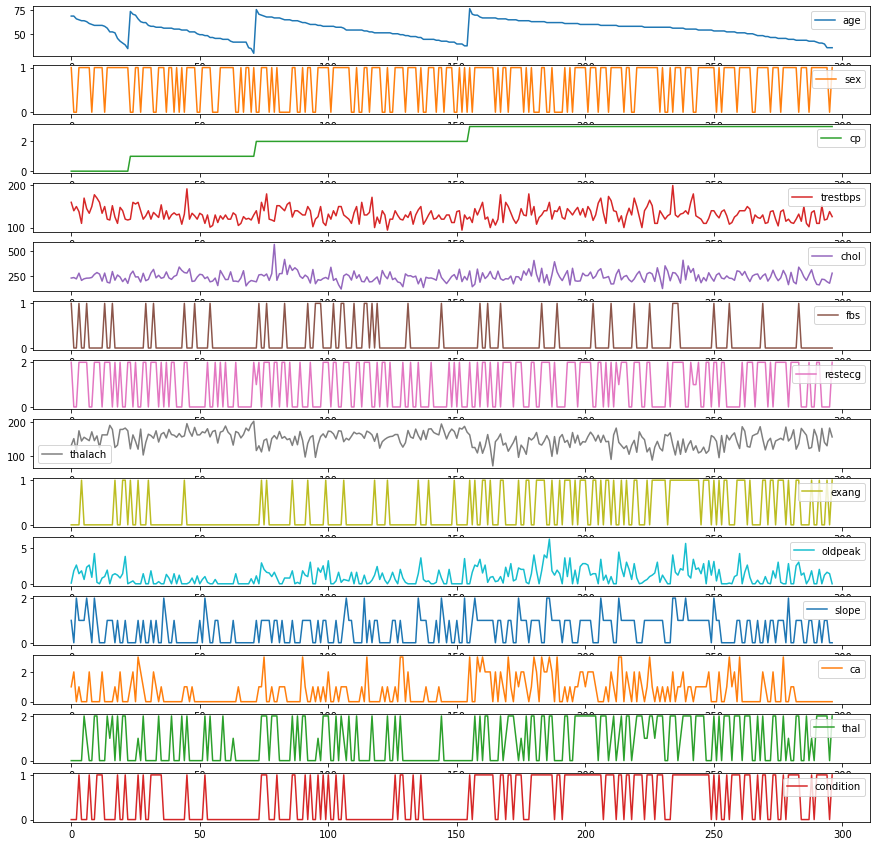

In [15]:
#plotting data dalam chart
dataset.plot(subplots=True, figsize=(15, 15), sharex=False, sharey=False)
plt.show()

## **2.3.5. PLOTTING KORELASI DATA**

Koefisien korelasi berubah dari minimum -1 ke maksimum 1:

- Koefisien 0 berarti tidak ada korelasi: kedua variabel tidak saling mempengaruhi.
- Koefisien positif berarti ada korelasi positif antar variabel: jika satu meningkat maka yang lain juga meningkat.
- Koefisien negatif berarti ada korelasi negatif antara variabel: jika satu meningkat, yang lain menurun dan sebaliknya.


<AxesSubplot:>

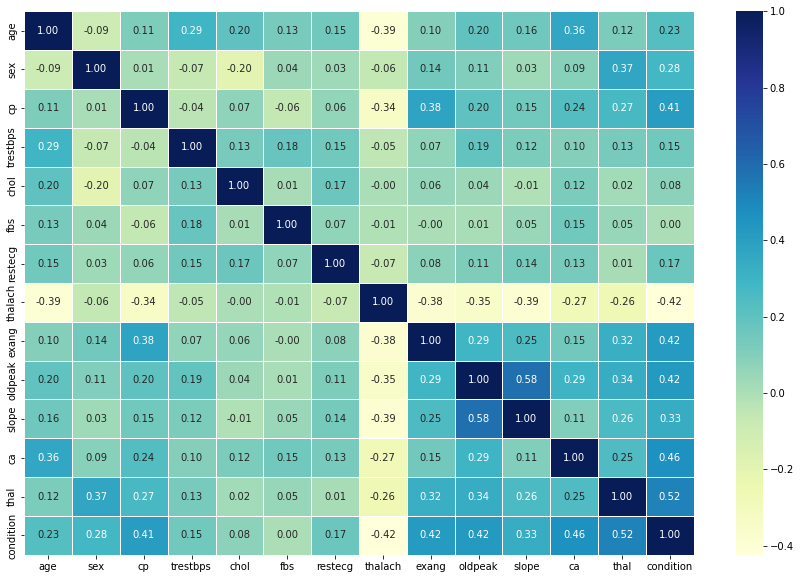

In [16]:
# Visualizing corraltion matrix with sns heatmap

corr_matrix = dataset.corr()
fig, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(corr_matrix,
            annot = True,
            linewidths = 0.5,
            fmt = ".2f",
            cmap = "YlGnBu")

# **3. DATA PREPARATION**

## **3.1. UJI KEPENTINGAN DATA**

menggunakan corrwith untuk melakukan test korelasi setiap kolom feature dengan target

In [17]:
# DEKLARASI CLASS TRAINING DAN TARGET
corr_target = dataX.corrwith(dataset['condition'])

### **3.1.1. PLOTTING KEPENTINGAN FITUR**

<AxesSubplot:title={'center':'Correlation with target'}>

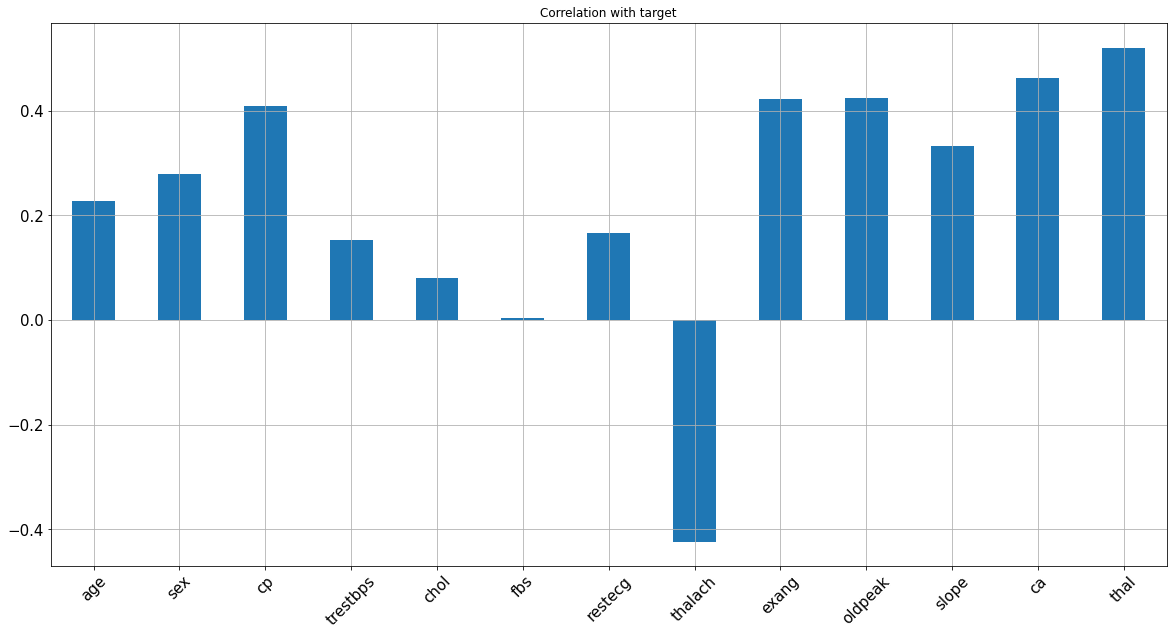

In [18]:
corr_target.plot.bar(figsize=(20, 10), title="Correlation with target", fontsize=15, rot=45, grid=True)

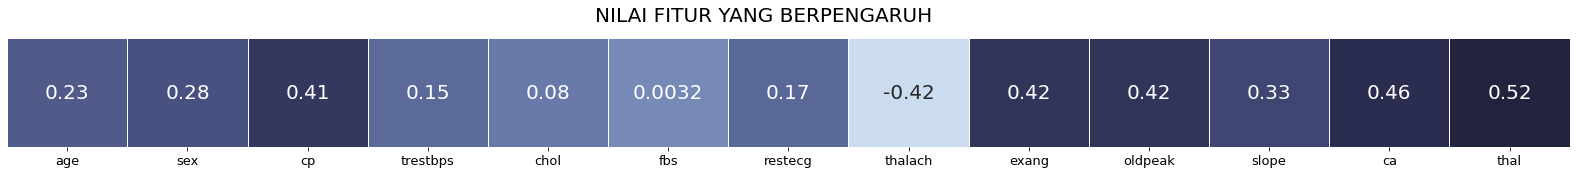

In [19]:
# MEMILIH KOLUMN YANG BERPENGARUH TERHADAP TARGET
arraykor = (corr_target.to_numpy()).reshape(1, -1)
plt.subplots(1, figsize=(28, 2))
sns.heatmap(arraykor, cmap=sns.color_palette("ch:start=.0,rot=-.1", as_cmap=True), cbar=False, linewidths=1, annot=True, annot_kws={"size": 20})
plt.yticks([], [])
plt.gca().set_xticklabels(dataX.columns, rotation=0, ha='center', fontsize=13)
plt.suptitle("NILAI FITUR YANG BERPENGARUH", fontsize=20, y=1.1)
plt.gcf().subplots_adjust(wspace=0.4)

**Data Yang Memiliki Pengaruh Penuh Terhadap Target Condition:**

* Age 0.23
* Sex 0.28
* Cp 0.41
* Trestbps 0.15
* Chol 0.08
* Restecg 0.17
* Thalac -0.42
* Exang 0.42
* Oldpeak 0.42
* Slope 0.33
* Ca 0.46
* Thal 0.52

berdasarkan korelasi tersebut dapat kita lihat chol dan fbs memiliki korelasi yang rendah terhadap target sedangkan thalac memiliki korelasi terbalik terhadap target


## **3.1. MEMILIH FITUR**

dikarenakan fbs memiliki korelasi paling rendah sehingga kita dapat melakukan drop kolom pada fbs.

In [20]:
# MENGHAPUS FITUR YANG TIDAK BERPENGARUH
dataX.drop(['fbs'],axis=1,inplace=True)
dataX.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,114,0,2.6,2,0,0
3,65,1,0,138,282,2,174,0,1.4,1,1,0
4,64,1,0,110,211,2,144,1,1.8,1,0,0


selanjutnya kita melakukan normalisasi dengan menggunakna robust scaler

In [21]:
# MENGGUNAKAN ROBUST SCALER
rs = RobustScaler()
X_scaled = rs.fit_transform(dataX)
dataX = pd.DataFrame(X_scaled, columns=dataX.columns)
dataX.describe()


,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
count,297.000000,297.000000,297.000000,297.00000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,-0.112147,-0.323232,0.158249,0.08468,0.066926,-0.001684,-0.103051,0.326599,0.159722,-0.397306,0.676768,0.417508
std,0.696134,0.468500,0.964859,0.88814,0.799963,0.497457,0.695199,0.469761,0.728827,0.618187,0.938965,0.478345
min,-2.076923,-1.000000,-2.000000,-1.80000,-1.800000,-0.500000,-2.484848,0.000000,-0.500000,-1.000000,0.000000,0.000000
25%,-0.615385,-1.000000,0.000000,-0.50000,-0.492308,-0.500000,-0.606061,0.000000,-0.500000,-1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.384615,0.000000,1.000000,0.50000,0.507692,0.500000,0.393939,1.000000,0.500000,0.000000,1.000000,1.000000
max,1.615385,0.000000,1.000000,3.50000,4.938462,0.500000,1.484848,1.000000,3.375000,1.000000,3.000000,1.000000


In [22]:
dataX.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1.000000,0.0,-2.0,1.5,-0.138462,0.5,-0.666667,0.0,-0.4375,0.0,1.0,0.0
1,1.000000,-1.0,-2.0,0.5,-0.061538,-0.5,-0.060606,0.0,0.6250,-1.0,2.0,0.0
2,0.769231,-1.0,-2.0,1.0,-0.261538,-0.5,-1.181818,0.0,1.1250,1.0,0.0,0.0
3,0.692308,0.0,-2.0,0.4,0.600000,0.5,0.636364,0.0,0.3750,0.0,1.0,0.0
4,0.615385,0.0,-2.0,-1.0,-0.492308,0.5,-0.272727,1.0,0.6250,0.0,0.0,0.0


# **4. ALGORITMA GENETIKA IMPLEMENTATION**

Membuat fungsi yang digunakan untuk melakukan tuning menggunakan GA

Membuat fungsi split menggunakan train test spling untuk membuat data training dan data testing


In [23]:
def split(datafeat,target):
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(datafeat, target, test_size=0.3, random_state=0)
    return X_trn, X_tst, Y_trn, Y_tst

Membuat fungsi inisialisasi populasi dengan menggunakan input jumlah populasi dan fitur, menggunakan np ones untuk membuat individu. disini digunakan untuk mengambil features data yang sesuai

In [24]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)     
        chromosome[:int(0.3*n_feat)]=False             
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

selanjutnya membuat fungsi untuk memilih parent yang akan dilakukan pernikahan, dengan menggunakan input populasi setelah fitness dan jumlah parent

In [25]:
def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

selanjutnya adalah crossover atau pernikahan dengan menggunakan popolasi setelah selection

In [26]:
def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen

proses selanjutnya adalah mutasi

In [27]:
def mutation(pop_after_cross,mutation_rate,n_feat):   
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = [] 
        for i in range(0,mutation_range):
            pos = randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]  
        pop_next_gen.append(chromo)
    return pop_next_gen

plotting generasi hasil GA dengan menggunakan point plot, dan dengan input nilai score, batas bawah nilai dan batas atas nilai, warna dan jumlah generasi

In [28]:
def plot(score,x,y,c = "b",gen = []):
    plt.figure(figsize=(6,4))
    ax = sns.pointplot(x=gen, y=score,color = c )
    ax.set(xlabel="Generation", ylabel="Accuracy")
    ax.set(ylim=(x,y))

# **5. MODELLING**

## **5.1. MEMBUAT MODEL MLP SKLEARN**

untuk pemodelan MLPClasiifier kita menggunakan library dari SKLEARN yaitu dengan menggunakan layer 50,100,50 dengan iterasi 100 dan activation function relu, solver adam, batch size 32 dan learning rate 0.001

In [29]:
modelMLP = MLPClassifier(hidden_layer_sizes=(50,100,50),max_iter=100, activation='relu',solver='adam',batch_size=32,learning_rate_init=0.001)
def fitness_scoreMLP(population):
    scores = []
    for chromosome in population:
        modelMLP.fit(X_train.iloc[:,chromosome],Y_train)         
        predictions = modelMLP.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(Y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)                                    
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

Berikut merupakan penerapan GA Hybrid (GA + MLPClassifier) 

In [30]:
def generationsMLP(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    generation = []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_scoreMLP(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        generation.append(i+1)
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score,generation

## **5.2. MEMBUAT MODEL MLP KERAS ADAM**

Berikut ini merupakan pemodelan MLP KERAS dengan optimizer ADAM dengan model MLP hidden layer 50,100,50 dengan input shape yang menyesuaikan dengan individu yang diambil, dengan output shape 1, output shape 1 dikarenakan output yang ada yaitu positive dan negative, dengan activation sigmoid.
dengan loss binary crossentropy dan optimizer adam dengan learning rate 0.001 dan metrics accuracy

In [31]:
def fitness_scoreKERAS1(population):
    scores = []
    for chromosome in population:
        input_shape_crom = X_train.iloc[:,chromosome].shape[1]
        # build modelKERAS1
        modelKERAS1 = models.Sequential()
        # input layer
        modelKERAS1.add(layers.Dense(32,input_shape=(input_shape_crom,),name='input_layer',activation='relu'))
        # hidden layer
        modelKERAS1.add(layers.Dense(50,name='hidden_layer1',activation='relu'))
        # hidden layer
        modelKERAS1.add(layers.Dense(100,name='hidden_layer2',activation='relu'))
        # hidden layer
        modelKERAS1.add(layers.Dense(50,name='hidden_layer3',activation='relu'))
        # dropout layer
        modelKERAS1.add(layers.Dropout(0.5))
        # output layer
        modelKERAS1.add(layers.Dense(1,name='output_layer',activation='sigmoid'))
        # compile modelKERAS1
        modelKERAS1.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
        modelKERAS1.fit(X_train.iloc[:,chromosome],Y_train,epochs = 100,batch_size=32,verbose=0)         
        predictions = modelKERAS1.predict(X_test.iloc[:,chromosome])
        predictions = (predictions > 0.5)
        scores.append(accuracy_score(Y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)                                    
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

Berikut merupakan penerapan GA Hybrid (GA + KERAS ADAM) 

In [32]:
def generationsKERAS1(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    generation = []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_scoreKERAS1(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        generation.append(i+1)
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score,generation

## **5.3. MEMBUAT MODEL MLP KERAS RMSPROP**

Berikut ini merupakan pemodelan MLP KERAS dengan optimizer ADAM dengan model MLP hidden layer 50,100,50 dengan input shape yang menyesuaikan dengan individu yang diambil, dengan output shape 1, output shape 1 dikarenakan output yang ada yaitu positive dan negative, dengan activation sigmoid.
dengan loss binary crossentropy dan optimizer RMSPROP dengan learning rate 0.001 dan metrics accuracy

In [33]:
def fitness_scoreKERAS2(population):
    scores = []
    for chromosome in population:
        input_shape_crom = X_train.iloc[:,chromosome].shape[1]
        # build modelKERAS2
        modelKERAS2 = models.Sequential()
        # input layer
        modelKERAS2.add(layers.Dense(32,input_shape=(input_shape_crom,),name='input_layer',activation='relu'))
        # hidden layer
        modelKERAS2.add(layers.Dense(50,name='hidden_layer1',activation='relu'))
        # hidden layer
        modelKERAS2.add(layers.Dense(100,name='hidden_layer2',activation='relu'))
        # hidden layer
        modelKERAS2.add(layers.Dense(50,name='hidden_layer3',activation='relu'))
        # dropout layer
        modelKERAS2.add(layers.Dropout(0.5))
        # output layer
        modelKERAS2.add(layers.Dense(1,name='output_layer',activation='sigmoid'))
        # compile modelKERAS2
        modelKERAS2.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])
        modelKERAS2.fit(X_train.iloc[:,chromosome],Y_train,epochs = 100,batch_size=32,verbose=0)         
        predictions = modelKERAS2.predict(X_test.iloc[:,chromosome])
        predictions = (predictions > 0.5)
        scores.append(accuracy_score(Y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)                                    
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

Berikut merupakan penerapan GA Hybrid (GA + KERAS RMSPROP) 

In [34]:
def generationsKERAS2(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    generation = []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_scoreKERAS2(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        generation.append(i+1)
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score,generation

# **6. EVALUASI**

## **6.1. EVALUASI MODEL MLPCLASSIFIER**

In [35]:
# %%script echo skipping # AGAR TIDAK DIJALANKAN PADA JUPYTER NOTEBOOK
X_train,X_test, Y_train, Y_test = split(dataX,datay)
chromo_df_MLP,score_bc_MLP,gen_MLP=generationsMLP(dataX,datay,size=80,n_feat=dataX.shape[1],n_parents=40,mutation_rate=0.25,n_gen=20,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)

Best score in generation 1 : [0.8666666666666667]
Best score in generation 2 : [0.8666666666666667]
Best score in generation 3 : [0.8666666666666667]
Best score in generation 4 : [0.8555555555555555]
Best score in generation 5 : [0.8666666666666667]
Best score in generation 6 : [0.8666666666666667]
Best score in generation 7 : [0.8555555555555555]
Best score in generation 8 : [0.8666666666666667]
Best score in generation 9 : [0.8666666666666667]
Best score in generation 10 : [0.8666666666666667]
Best score in generation 11 : [0.8777777777777778]
Best score in generation 12 : [0.8555555555555555]
Best score in generation 13 : [0.8444444444444444]
Best score in generation 14 : [0.8222222222222222]
Best score in generation 15 : [0.8666666666666667]
Best score in generation 16 : [0.8555555555555555]
Best score in generation 17 : [0.8555555555555555]
Best score in generation 18 : [0.8777777777777778]
Best score in generation 19 : [0.8777777777777778]
Best score in generation 20 : [0.9]


In [36]:
id = 1
for i in score_bc_MLP:
    print('Best score in generation',id,':',i)
    id+=1

Best score in generation 1 : 0.8666666666666667
Best score in generation 2 : 0.8666666666666667
Best score in generation 3 : 0.8666666666666667
Best score in generation 4 : 0.8555555555555555
Best score in generation 5 : 0.8666666666666667
Best score in generation 6 : 0.8666666666666667
Best score in generation 7 : 0.8555555555555555
Best score in generation 8 : 0.8666666666666667
Best score in generation 9 : 0.8666666666666667
Best score in generation 10 : 0.8666666666666667
Best score in generation 11 : 0.8777777777777778
Best score in generation 12 : 0.8555555555555555
Best score in generation 13 : 0.8444444444444444
Best score in generation 14 : 0.8222222222222222
Best score in generation 15 : 0.8666666666666667
Best score in generation 16 : 0.8555555555555555
Best score in generation 17 : 0.8555555555555555
Best score in generation 18 : 0.8777777777777778
Best score in generation 19 : 0.8777777777777778
Best score in generation 20 : 0.9


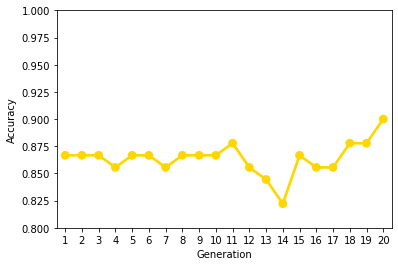

In [37]:
# %%script echo skipping # AGAR TIDAK DIJALANKAN PADA JUPYTER NOTEBOOK
arr_score = np.array(score_bc_MLP)
plot(score_bc_MLP,0.8,1,c = "gold",gen = gen_MLP)

## **6.2. EVALUASI MODEL MLP KERAS ADAM**

In [38]:
X_train,X_test, Y_train, Y_test = split(dataX,datay)
chromo_df_KERAS1,score_bc_KERAS1,gen_KERAS1=generationsKERAS1(dataX,datay,size=80,n_feat=dataX.shape[1],n_parents=40,mutation_rate=0.25,n_gen=20,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)

3/3 [==============================] - 0s 8ms/step
Best score in generation 1 : [0.8777777777777778]
3/3 [==============================] - 0s 0s/step
Best score in generation 2 : [0.8555555555555555]
3/3 [==============================] - 0s 8ms/step
Best score in generation 3 : [0.8777777777777778]
3/3 [==============================] - 0s 688us/step
Best score in generation 4 : [0.8555555555555555]
3/3 [==============================] - 0s 860us/step
Best score in generation 5 : [0.8444444444444444]
3/3 [==============================] - 0s 0s/step
Best score in generation 6 : [0.8555555555555555]
3/3 [==============================] - 0s 8ms/step
Best score in generation 7 : [0.8444444444444444]
3/3 [==============================] - 0s 0s/step
Best score in generation 8 : [0.8777777777777778]
3/3 [==============================] - 0s 0s/step
Best score in generation 9 : [0.8888888888888888]
3/3 [==============================] - 0s 2ms/step
Best score in generation 10 : [0.8666666

In [39]:
id = 1
for i in score_bc_KERAS1:
    print('Best score in generation',id,':',i)
    id+=1

Best score in generation 1 : 0.8777777777777778
Best score in generation 2 : 0.8555555555555555
Best score in generation 3 : 0.8777777777777778
Best score in generation 4 : 0.8555555555555555
Best score in generation 5 : 0.8444444444444444
Best score in generation 6 : 0.8555555555555555
Best score in generation 7 : 0.8444444444444444
Best score in generation 8 : 0.8777777777777778
Best score in generation 9 : 0.8888888888888888
Best score in generation 10 : 0.8666666666666667
Best score in generation 11 : 0.8555555555555555
Best score in generation 12 : 0.8333333333333334
Best score in generation 13 : 0.8888888888888888
Best score in generation 14 : 0.8666666666666667
Best score in generation 15 : 0.8666666666666667
Best score in generation 16 : 0.8444444444444444
Best score in generation 17 : 0.8333333333333334
Best score in generation 18 : 0.8666666666666667
Best score in generation 19 : 0.8888888888888888
Best score in generation 20 : 0.8666666666666667


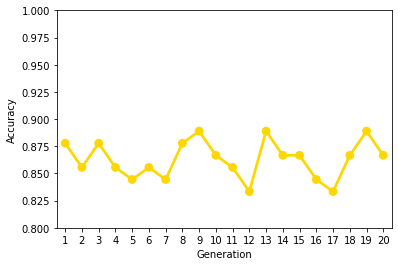

In [40]:
arr_score = np.array(score_bc_KERAS1)
plot(score_bc_KERAS1,0.8,1,c = "gold",gen=gen_KERAS1)

## **6.3. EVALUASI MODEL MLP KERAS RMSProp**

In [41]:
X_train,X_test, Y_train, Y_test = split(dataX,datay)
chromo_df_KERAS2,score_bc_KERAS2,gen_KERAS2=generationsKERAS2(dataX,datay,size=80,n_feat=dataX.shape[1],n_parents=40,mutation_rate=0.25,n_gen=20,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)

3/3 [==============================] - 0s 3ms/step
Best score in generation 1 : [0.8888888888888888]
3/3 [==============================] - 0s 2ms/step
Best score in generation 2 : [0.8777777777777778]
3/3 [==============================] - 0s 2ms/step
Best score in generation 3 : [0.8666666666666667]
3/3 [==============================] - 0s 2ms/step
Best score in generation 4 : [0.8777777777777778]
3/3 [==============================] - 0s 3ms/step
Best score in generation 5 : [0.8777777777777778]
3/3 [==============================] - 0s 3ms/step
Best score in generation 6 : [0.8555555555555555]
3/3 [==============================] - 0s 2ms/step
Best score in generation 7 : [0.8555555555555555]
3/3 [==============================] - 0s 3ms/step
Best score in generation 8 : [0.8444444444444444]
3/3 [==============================] - 0s 2ms/step
Best score in generation 9 : [0.8888888888888888]
3/3 [==============================] - 0s 2ms/step
Best score in generation 10 : [0.8777777

In [42]:
id = 1
for i in score_bc_KERAS2:
    print('Best score in generation',id,':',i)
    id+=1

Best score in generation 1 : 0.8888888888888888
Best score in generation 2 : 0.8777777777777778
Best score in generation 3 : 0.8666666666666667
Best score in generation 4 : 0.8777777777777778
Best score in generation 5 : 0.8777777777777778
Best score in generation 6 : 0.8555555555555555
Best score in generation 7 : 0.8555555555555555
Best score in generation 8 : 0.8444444444444444
Best score in generation 9 : 0.8888888888888888
Best score in generation 10 : 0.8777777777777778
Best score in generation 11 : 0.8777777777777778
Best score in generation 12 : 0.8555555555555555
Best score in generation 13 : 0.8333333333333334
Best score in generation 14 : 0.8888888888888888
Best score in generation 15 : 0.8555555555555555
Best score in generation 16 : 0.8888888888888888
Best score in generation 17 : 0.8777777777777778
Best score in generation 18 : 0.8666666666666667
Best score in generation 19 : 0.9111111111111111
Best score in generation 20 : 0.8777777777777778


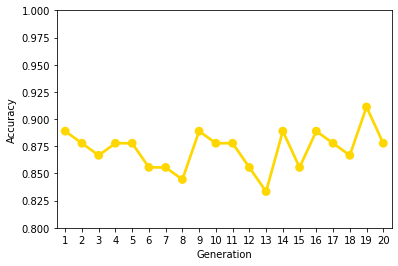

In [43]:
arr_score = np.array(score_bc_KERAS2)
plot(score_bc_KERAS2,0.8,1,c = "gold",gen=gen_KERAS2)

# **7. KESIMPULAN**

pada dataset heart cleveland yang saya gunakan terdapat 14 atribute yang ada yaitu 13 atribute features dan 1 atribute target, kondisi atribute target adalah 'terjangkit' dan 'tidak terjangkit', pada proses persiapan data menggunakan corrwith untuk melihat korelasi atribut features terhadap atribut target, pada saat melihat nilai korelasi terebut terdapat 1 atribut yang memiliki tingkat korelasi yang rendah yaitu 'fbs' dengan nilai 0.0032 sehingga kolom tersebut saya hilangkan.
selanjutnya proses pembuatan modelling GA kita membuat inisialisasi populasi, model fitness, selection, crossover, dan mutation. dalam model fitness kita membuat masing masing model dengan MLPClassifier dan KERASSequential. kemudian untuk menjalankan model GA.
 

berdasarkan penerapan GA Hybrid MLP tersebut didapatkan data sebagai berikut

In [44]:
df_kesimpulan = pd.DataFrame({'MLP':score_bc_MLP,'KERAS_ADAM':score_bc_KERAS1,'KERAS_RMSPROP':score_bc_KERAS2},index=gen_MLP)
df_kesimpulan

,MLP,KERAS_ADAM,KERAS_RMSPROP
1,0.866667,0.877778,0.888889
2,0.866667,0.855556,0.877778
3,0.866667,0.877778,0.866667
4,0.855556,0.855556,0.877778
5,0.866667,0.844444,0.877778
6,0.866667,0.855556,0.855556
7,0.855556,0.844444,0.855556
8,0.866667,0.877778,0.844444
9,0.866667,0.888889,0.888889
10,0.866667,0.866667,0.877778


<AxesSubplot:title={'center':'Best Score per Generation'}>

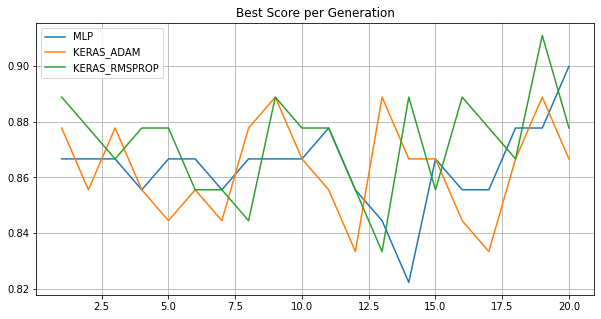

In [45]:
df_kesimpulan.plot(figsize=(10,5),title='Best Score per Generation',grid=True)

In [48]:
print('Best score MLP:',max(score_bc_MLP),'in generation',score_bc_MLP.index(max(score_bc_MLP)))
print('Best score KERAS_ADAM:',max(score_bc_KERAS1),'in generation',score_bc_KERAS1.index(max(score_bc_KERAS1)))
print('Best score KERAS_RMSPROP:',max(score_bc_KERAS2),'in generation',score_bc_KERAS2.index(max(score_bc_KERAS2)))

Best score MLP: 0.9 in generation 19
Best score KERAS_ADAM: 0.8888888888888888 in generation 8
Best score KERAS_RMSPROP: 0.9111111111111111 in generation 18


Dengan data setiap generasi tersebut didapatkan rata-rata sebagai berikut

In [49]:
df_kesimpulan_rata_rata = pd.DataFrame({'MLP':np.mean(score_bc_MLP),'KERAS_ADAM':np.mean(score_bc_KERAS1),'KERAS_RMSPROP':np.mean(score_bc_KERAS2)},index=['Rata-rata Akurasi'])
df_kesimpulan_rata_rata

,MLP,KERAS_ADAM,KERAS_RMSPROP
Rata-rata Akurasi,0.863889,0.862778,0.872222


<AxesSubplot:title={'center':'Rata-rata Akurasi GA Hybrid'}>

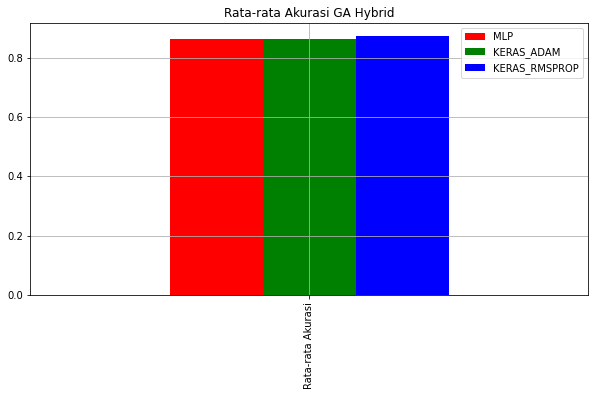

In [51]:
df_kesimpulan_rata_rata.plot(kind='bar',figsize=(10,5),title='Rata-rata Akurasi GA Hybrid',color='rgb',grid=True)

In [52]:
print('berdasarkan hasil kesimpulan tersebut didapatkan bahwa model terbaik adalah model',df_kesimpulan_rata_rata.idxmax(axis=1)[0],'dengan akurasi',df_kesimpulan_rata_rata.max(axis=1)[0])

berdasarkan hasil kesimpulan tersebut didapatkan bahwa model terbaik adalah model KERAS_RMSPROP dengan akurasi 0.8722222222222221


berdasarkan ketiga model tersebut, mendapatkan kesimpulan bahwa model terbaik adalah model TENSORFLOW KERAS dengan Optimizer ADAM dengan akurasi 0.873334. sedangkan posisi kedua dengan akurasi 0.87222 yaitu SKLEARN MLPClassifier dan posisi terakhir dengan model TENSORFLOW KERAS dengan Optimizer RMSPROP dengan akurasi 0.86111.
berdasarkan data akurasi tersebut didapatkan bahwa model tersebut sudah cukup baik dan perbedaan antara model tersebut yang paling signifikan dikarenakan optimizer model TENSORFLOW KERAS RMSPROP, sedangkan MLPClassifier dan KERAS ADAM sama. 
ketiga model tersebut sama sama menggunakna hidden layer 50,100,50 dengan batch size 32, epoch/iteration 100, dan learning rate 0.001